#### About

> Time series analysis

Time series analysis is a statistical method used to analyze data that is measured over time. It helps to identify patterns and trends in the data and make predictions based on past observations. There are various methods used in time series analysis such as moving averages, exponential smoothing, seasonal decomposition, ARIMA models, and AR models.

Moving averages: Moving averages is a method used to smooth out variations in a time series data by calculating the average of a specified number of consecutive observations.

Exponential smoothing: Exponential smoothing is a method used to forecast time series data that assumes the future value of a variable is a weighted average of past observations, with the weights decreasing exponentially as the observations get older.

Seasonal decomposition: Seasonal decomposition is a method used to identify and separate the seasonal component, trend component, and random component of a time series data.

ARIMA models: Autoregressive Integrated Moving Average (ARIMA) models are used to analyze time series data that is not stationary. It involves differencing the data to make it stationary and fitting the model to the differenced data.

AR models: Autoregressive (AR) models are used to analyze time series data that is stationary. It involves using past values of the variable to predict future values.



Use Cases:

- Predicting future sales of a company based on past sales data.
- Forecasting stock prices based on past prices and other economic factors.
- Analyzing website traffic to identify trends and make predictions about future traffic.
- Forecasting demand for products based on historical sales data.
- Predicting the weather based on past weather patterns.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset


Example on Airpassengers dataset


In [3]:
# Load data
data = get_rdataset('AirPassengers').data
data.set_index('time', inplace=True)
data.index.freq = 'MS'

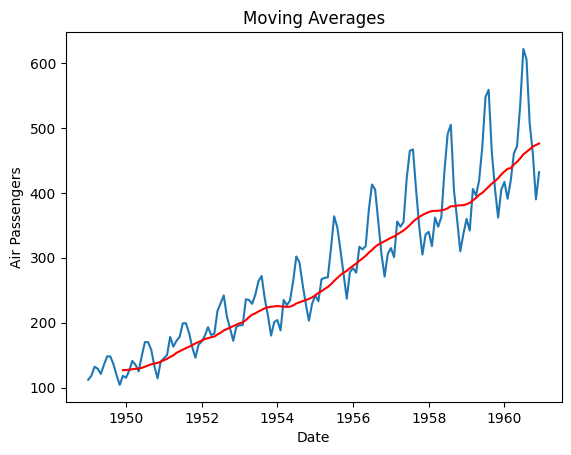

In [4]:
# Moving averages
window_size = 12
rolling_mean = data['value'].rolling(window=window_size).mean()
plt.plot(data['value'])
plt.plot(rolling_mean, color='red')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Air Passengers')
plt.show()

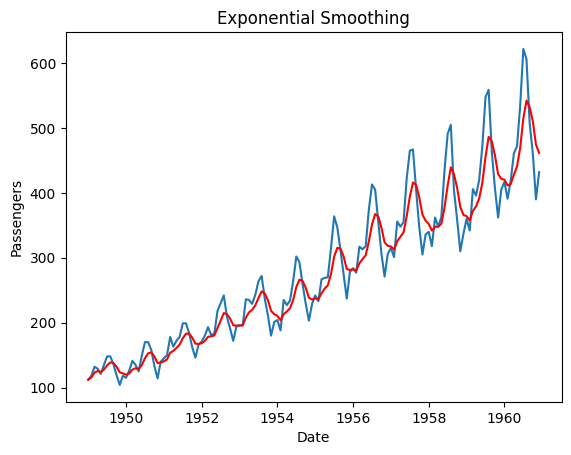

In [8]:
# Exponential smoothing
alpha = 0.3
exp_smooth = data['value'].ewm(alpha=alpha).mean()
plt.plot(data['value'])
plt.plot(exp_smooth, color='red')
plt.title('Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()

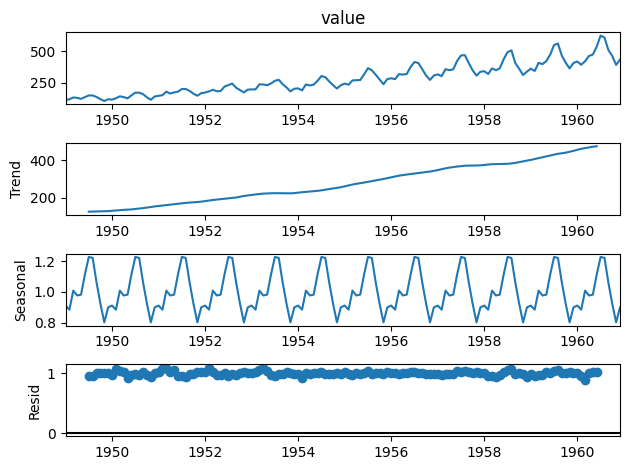

In [10]:

# Seasonal decomposition
result = seasonal_decompose(data['value'], model='multiplicative', period=12)
result.plot()
plt.show()


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


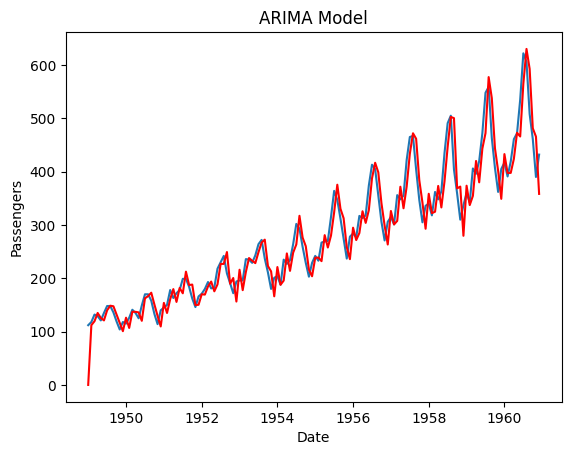

In [14]:
# ARIMA models
model = ARIMA(data['value'], order=(1, 1, 1))
model_fit = model.fit()
plt.plot(data['value'])
plt.plot(model_fit.fittedvalues, color='red')
plt.title('ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.show()